In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/fpdatmin/main/Reviews2.csv')

In [ ]:
df.dtypes

Score       int64
Summary    object
dtype: object

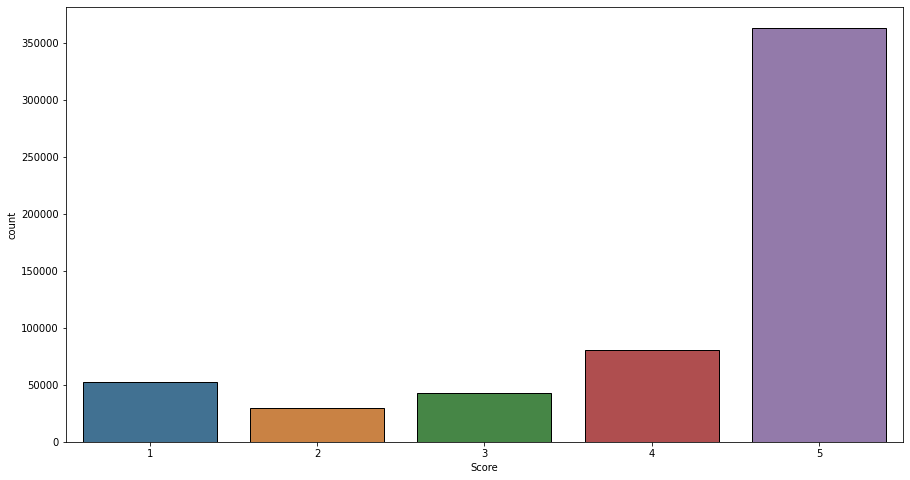

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

In [ ]:
df.isnull().sum()

Score       0
Summary    27
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df.sample(n=10000)

In [ ]:
df['Summary'] = df['Summary'].astype(str)

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [ ]:
df['Summary']=df['Summary'].apply(text_cleaning)

In [ ]:
df

,Score,Summary
336262,4,great for training
463431,5,coffee deliscioso
348451,2,stale stale stale
128603,5,top notch matcha
174624,5,delicious chip
...,...,...
344864,1,disgust in a can
442165,5,best organic sandwich cookie
268796,5,decadence made healthful
322184,2,not everlasting


In [ ]:
y=df['Score']
x=df['Summary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(ngram_range=(1,2),stop_words='english')
X_train_counts = count_vect.fit_transform(x_train) 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
lr=LogisticRegression(max_iter=100000)

In [ ]:
from sklearn.metrics import accuracy_score
lr.fit(X_train_tfidf,y_train)
pred_1=lr.predict(X_test_tfidf)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.67      0.27      0.39       166
           2       0.14      0.01      0.02       102
           3       0.55      0.12      0.20       138
           4       0.40      0.09      0.15       277
           5       0.70      0.98      0.82      1317

    accuracy                           0.69      2000
   macro avg       0.49      0.30      0.32      2000
weighted avg       0.62      0.69      0.61      2000

Confusion matrix, without normalization
[[  45    5    1    2  113]
 [  15    1    4    3   79]
 [   3    1   17    7  110]
 [   3    0    7   26  241]
 [   1    0    2   27 1287]]


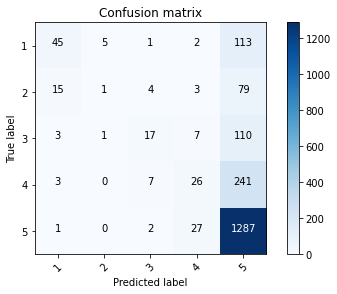

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_1, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_mulnb = naive_bayes.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.68      0.08      0.14       166
           2       0.00      0.00      0.00       102
           3       0.71      0.04      0.07       138
           4       0.45      0.02      0.03       277
           5       0.67      1.00      0.80      1317

    accuracy                           0.67      2000
   macro avg       0.50      0.23      0.21      2000
weighted avg       0.61      0.67      0.55      2000

Confusion matrix, without normalization
[[  13    1    0    0  152]
 [   4    0    1    0   97]
 [   1    0    5    2  130]
 [   1    0    1    5  270]
 [   0    0    0    4 1313]]


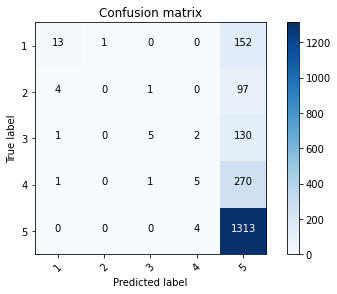

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mulnb, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_mulnb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_bernoulli = BernoulliNB()
naive_bayes_bernoulli.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_bernb = naive_bayes_bernoulli.predict(X_test_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      0.01      0.02       166
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00       138
           4       0.57      0.01      0.03       277
           5       0.66      1.00      0.80      1317

    accuracy                           0.66      2000
   macro avg       0.45      0.21      0.17      2000
weighted avg       0.60      0.66      0.53      2000

Confusion matrix, without normalization
[[   2    0    0    0  164]
 [   0    0    0    1  101]
 [   0    0    0    1  137]
 [   0    0    0    4  273]
 [   0    0    0    1 1316]]


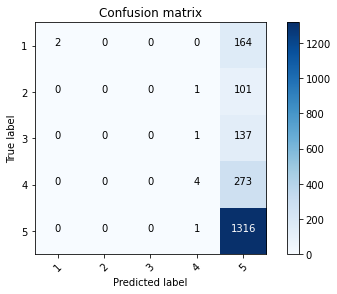

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_bernb, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_bernb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_tfidf, y_train) 
predSVM = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.74      0.29      0.42       166
           2       0.11      0.01      0.02       102
           3       0.51      0.14      0.22       138
           4       0.44      0.09      0.15       277
           5       0.70      0.98      0.82      1317

    accuracy                           0.69      2000
   macro avg       0.50      0.30      0.32      2000
weighted avg       0.63      0.69      0.61      2000

Confusion matrix, without normalization
[[  48    5    3    2  108]
 [  11    1    6    2   82]
 [   2    2   19    4  111]
 [   3    0    6   26  242]
 [   1    1    3   25 1287]]


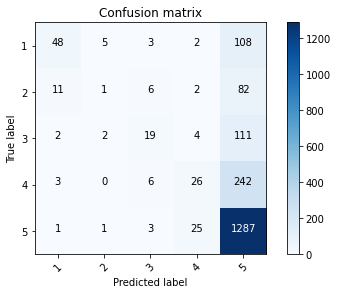

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_tfidf, y_train) 
predSVM2 = clf2.predict(X_test_tfidf)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM2, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
mlp.fit(X_train_tfidf, y_train)
predANN = mlp.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.44      0.43      0.44       166
           2       0.17      0.13      0.14       102
           3       0.21      0.17      0.19       138
           4       0.26      0.21      0.23       277
           5       0.76      0.83      0.80      1317

    accuracy                           0.63      2000
   macro avg       0.37      0.35      0.36      2000
weighted avg       0.60      0.63      0.61      2000

Confusion matrix, without normalization
[[  72   24   12    9   49]
 [  28   13   13   10   38]
 [  13    6   23   24   72]
 [  15   10   17   58  177]
 [  36   25   44  120 1092]]


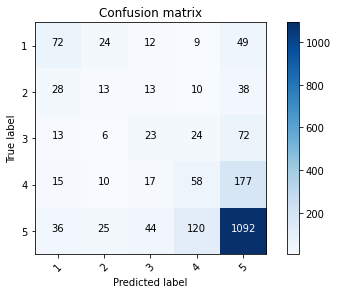

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
predrf = rf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.57      0.43      0.49       166
           2       0.17      0.06      0.09       102
           3       0.35      0.16      0.22       138
           4       0.33      0.14      0.19       277
           5       0.74      0.93      0.83      1317

    accuracy                           0.68      2000
   macro avg       0.43      0.34      0.36      2000
weighted avg       0.61      0.68      0.63      2000

Confusion matrix, without normalization
[[  72   11    7    5   71]
 [  22    6    8   13   53]
 [  12    6   22   11   87]
 [   8    1   11   38  219]
 [  13   12   15   49 1228]]


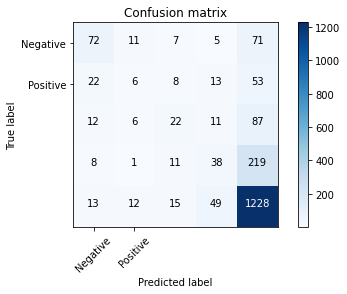

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')